In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scienceplots
from nanonets import Simulation

plt.style.use(["science","bright","grid"])

topo    = {"Nx": 1,"Ny": 1, "electrode_type": ['constant','constant']}
sim_c   = Simulation(topo)
ele_c   = sim_c.ELE_CHARGE_A_C
cap_t   = sim_c.get_capacitance_matrix()[0]
cap_g   = sim_c.self_capacitance_sphere(3.9,10.0)
cap_m   = sim_c.mutual_capacitance_adjacent_spheres(2.6,10.0,10.0,1.0)
def s_i_th(Ug, n):
    return ((n+0.5)*ele_c + cap_g*Ug)/(cap_t-cap_m)
def i_d_th(Ug, n):
    return ((0.5-n)*ele_c - cap_g*Ug)/(cap_m)

In [9]:
N_NP    = 9
topo    = {"Nx": N_NP, "Ny": N_NP, "e_pos" : [[0,0], [int((N_NP-1)/2),0], [N_NP-1,0], [0,int((N_NP-1)/2)],
                       [0,N_NP-1], [N_NP-1,int((N_NP)/2)], [int((N_NP)/2),(N_NP-1)], [N_NP-1,N_NP-1]], "electrode_type": ['constant']*8}
sim_c   = Simulation(topo)
sim_c.get_slowest_linear_time_constant()

np.float64(3.1943502805261785e-09)

In [11]:
data1   = pd.read_csv("data/Nx=9_Ny=9_Ne=8_0.000_True.csv")
data2   = pd.read_csv("data/Nx=9_Ny=9_Ne=8_0.000_False.csv")
x1      = data1['E0'].values*1000
x2      = data2['E0'].values*1000
y1      = data1['Observable'].values*1e-6
y2      = data2['Observable'].values*1e-6
y1_e    = data1['Error'].values*1e-6
y2_e    = data2['Error'].values*1e-6

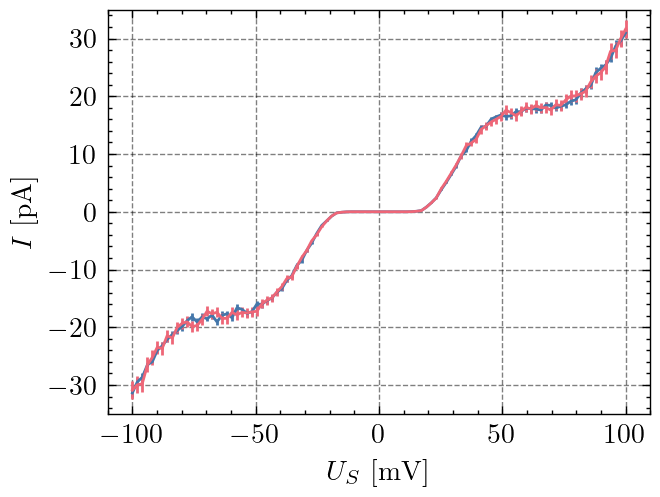

In [15]:
fig, ax = plt.subplots(dpi=200)
_   = ax.errorbar(x1, y1, y1_e)
_   = ax.errorbar(x2, y2, y2_e)
_   = ax.set_xlabel("$U_S$ [mV]")
_   = ax.set_ylabel("$I$ [pA]")
_   = ax.set_ylim(-35,35)

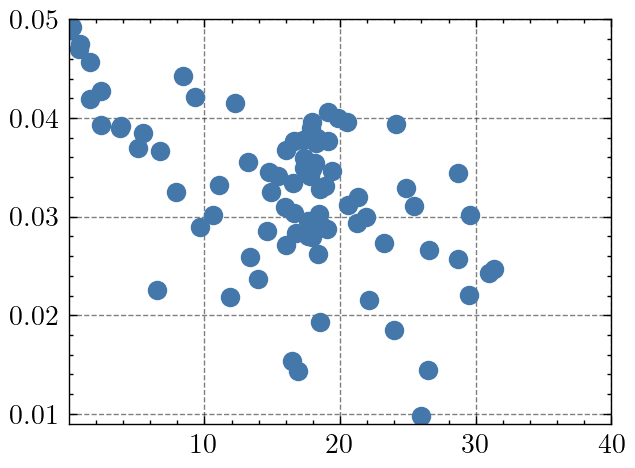

In [46]:
fig = plt.figure(dpi=200)
ax  = fig.add_subplot()
_   = ax.plot(np.abs(y1), np.abs(y1_e/y1), ls='', marker='o')
# _   = ax.plot(np.abs(y2), np.abs(y2_e/y2), ls='', marker='s')
# _   = ax.set_xscale('log')
# _   = ax.set_yscale('log')
_   = ax.set_xlim(1e-2, 4e1)
_   = ax.set_ylim(9e-3, 5e-2)